In [1]:
# Importing libraries and dataset

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.cluster import KMeans

In [50]:
zoo = pd.read_csv('C:/Users/admin/Downloads/animal_DB/zoo.csv')
zoo.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [21]:
class_types = pd.read_csv('C:/Users/admin/Downloads/animal_DB/class.csv')
class_types

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


# Class types visualization

{'Mammal': 41, 'Bird': 20, 'Reptile': 5, 'Fish': 13, 'Amphibian': 4, 'Bug': 8, 'Invertebrate': 10}


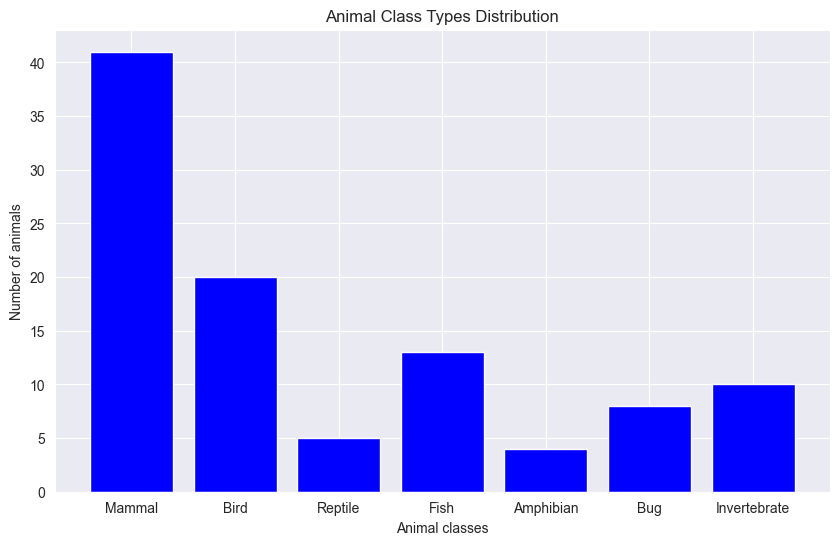

In [51]:

animal_classes = class_types.iloc[:,2]
n_of_animals = class_types.iloc[:,1]

animals_distribution = dict(zip(animal_classes, n_of_animals))
print(animals_distribution)

plt.figure(figsize=(10, 6)) #width of 10 inches and a height of 6 inches
plt.bar(animal_classes, n_of_animals, color='blue')
plt.xlabel('Animal classes')
plt.ylabel('Number of animals')
plt.title('Animal Class Types Distribution')
plt.show()

In [79]:
from animals.functions import distribution_plot



IndentationError: unexpected indent (functions.py, line 42)

In [6]:
df=pd.merge(zoo,class_types,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


# Data preparation

## splitting data into training set and testing set

In [52]:
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label
    
    
X.head()
Y.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
#random state is pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code, sklearn suggests 42
#the stratify parameter splits the dataset in a way that the proportion of values in the sample will be the same as the proportion provided with this parameter.

In [ ]:
from animals.functions import splitting_data

In [72]:
np.array(X_train)
np.array(X_test)
print("Size of the training set:", len(X_train))
print("Size of the test set:", len(X_test))

Size of the training set: 70
Size of the test set: 31


## feature scaling

In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
from animals.functions import scaling

In [76]:
print(X_train)

[[-0.8660254  -0.5         0.79240582 ... -1.63835604 -0.38411064
  -0.91766294]
 [ 1.15470054 -0.5        -1.26197963 ...  0.61036794  2.60341656
   1.08972474]
 [ 1.15470054 -0.5        -1.26197963 ...  0.61036794 -0.38411064
   1.08972474]
 ...
 [-0.8660254  -0.5         0.79240582 ...  0.61036794 -0.38411064
   1.08972474]
 [ 1.15470054 -0.5         0.79240582 ... -1.63835604 -0.38411064
  -0.91766294]
 [-0.8660254   2.          0.79240582 ...  0.61036794 -0.38411064
  -0.91766294]]


In [77]:
print(X_test)

[[ 1.15470054 -0.5        -1.26197963  1.22474487 -0.58834841 -0.79240582
  -1.12163475  0.84102145  0.47756693  0.52223297 -0.2773501  -0.47756693
  -0.37246127 -1.63835604 -0.38411064  1.08972474]
 [-0.8660254   2.          0.79240582 -0.81649658  1.69967317  1.26197963
   0.89155583 -1.18903032  0.47756693  0.52223297 -0.2773501  -0.47756693
  -0.37246127  0.61036794 -0.38411064 -0.91766294]
 [-0.8660254  -0.5        -1.26197963 -0.81649658 -0.58834841  1.26197963
   0.89155583  0.84102145  0.47756693 -1.91485422  3.60555128 -0.47756693
  -1.39490398  0.61036794 -0.38411064 -0.91766294]
 [-0.8660254  -0.5         0.79240582 -0.81649658 -0.58834841 -0.79240582
  -1.12163475 -1.18903032 -2.09394732  0.52223297 -0.2773501  -0.47756693
   1.67242414 -1.63835604 -0.38411064 -0.91766294]
 [ 1.15470054 -0.5        -1.26197963  1.22474487 -0.58834841 -0.79240582
  -1.12163475  0.84102145  0.47756693  0.52223297 -0.2773501  -0.47756693
   0.64998143  0.61036794 -0.38411064  1.08972474]
 [-0.

In [15]:
X_test.shape

(31, 16)

# K Nearest Neighbors

## implementation

In [16]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier()

## predicting a new result

In [17]:
##predicting a new result
Y_pred_knn = classifier_knn.predict(X_test)
print(Y_pred_knn)

[1 2 4 6 1 7 2 1 1 4 1 4 2 4 3 1 1 1 1 1 1 2 4 5 2 1 1 6 2 7 6]


In [18]:
print(Y_test)


32     1
79     2
76     3
88     6
17     1
53     7
78     2
31     1
54     1
86     4
50     1
12     4
83     2
34     4
91     3
35     1
67     1
3      1
70     1
4      1
96     1
41     2
61     4
25     5
20     2
36     1
22     1
72     7
100    2
81     7
42     6
Name: class_type, dtype: int64


## accuracy KNN

In [20]:
##accuracy KNN
print("Test Accuracy : ",classifier_knn.score(X_test,Y_test))
print("Train Accuracy : ",classifier_knn.score(X_train,Y_train))
#when  calculating the accuracy, take the argmax over the second dimension (i.e. the number of classes) to get the actual and predicted class before calling accuracy_score.

Test Accuracy :  0.9354838709677419
Train Accuracy :  0.9714285714285714


## results comparison

In [21]:
tmp_knn = pd.DataFrame(zoo)
pred_knn = pd.DataFrame(Y_pred_knn,dtype=int, index=Y_test.index)
tmp_knn['prediction'] = pred_knn
print(tmp_knn)
print(tmp_knn.shape)

tmp_knn = tmp_knn.dropna()
print(tmp_knn)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [22]:
for i in range(tmp_knn.shape[0]):
    if tmp_knn.iloc[i][17] != tmp_knn.iloc[i][18]:
        print('  '+str(tmp_knn.iloc[i][0]))
        print('class type: '+str(tmp_knn.iloc[i][17]))
        print('prediction: '+str(tmp_knn.iloc[i][18]))

  scorpion
class type: 7
prediction: 6.0
  seasnake
class type: 3
prediction: 4.0


C:\Users\admin\AppData\Local\Temp\ipykernel_4904\1949419264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_knn.iloc[i][17] != tmp_knn.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\1949419264.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_knn.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\1949419264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class type

# Decision tree 

## implementation

In [23]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

## predicting a new result

In [24]:
## predictions
y_pred_tree = classifier_dt.predict(X_test)
print(y_pred_tree)

[1 2 7 6 1 7 2 1 1 4 1 4 2 4 3 1 1 1 1 1 1 2 4 5 2 1 1 6 2 7 6]


In [25]:
print(Y_test)

32     1
79     2
76     3
88     6
17     1
53     7
78     2
31     1
54     1
86     4
50     1
12     4
83     2
34     4
91     3
35     1
67     1
3      1
70     1
4      1
96     1
41     2
61     4
25     5
20     2
36     1
22     1
72     7
100    2
81     7
42     6
Name: class_type, dtype: int64


## decision tree accuracy

In [26]:
print("Test Accuracy : ",classifier_dt.score(X_test,Y_test))
print("Train Accuracy : ",classifier_dt.score(X_train,Y_train))

Test Accuracy :  0.9354838709677419
Train Accuracy :  1.0


## results comparison

In [27]:

tmp_tree = pd.DataFrame(zoo)
pred_dt = pd.DataFrame(y_pred_tree,dtype=int, index=Y_test.index)
tmp_tree['prediction'] = pred_dt
#print(tmp_tree)
print(tmp_tree.shape)

tmp_tree = tmp_tree.dropna()
print(tmp_tree)

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
17         deer     1         0     0     1         0        0         0   
20         dove     0         1     1     0         1        0         0   
22     elephant     1         0     0     1         0        0         0   
25         frog     0         0     1     0         0        1         1   
31         goat     1         0     0     1         0        0         0   
32      gorilla     1         0     0     1         0        0         0   
34      haddock     0         0     1     0         0        1         0   
35      hamster     1         0     0     1         0        0         0   
36         hare     1         0     0     1         0        0         0   
41

In [28]:
for i in range(tmp_tree.shape[0]):
    if tmp_tree.iloc[i][17] != tmp_tree.iloc[i][18]:
        print('  '+str(tmp_tree.iloc[i][0]))
        print('class type: '+str(tmp_tree.iloc[i][17]))
        print('prediction: '+str(tmp_tree.iloc[i][18]))

  scorpion
class type: 7
prediction: 6.0
  seasnake
class type: 3
prediction: 7.0


C:\Users\admin\AppData\Local\Temp\ipykernel_4904\4182168241.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_tree.iloc[i][17] != tmp_tree.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\4182168241.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_tree.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\4182168241.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class t

# Random Forest

## implementation

In [29]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, Y_train)

RandomForestClassifier()

## predict a new result

In [30]:
y_pred_forest = classifier_RF.predict(X_test)
print(y_pred_forest)

[1 2 1 6 1 7 2 1 1 4 1 4 2 4 3 1 1 1 1 1 1 2 4 5 2 1 1 1 2 7 6]


In [31]:
print(Y_test)

32     1
79     2
76     3
88     6
17     1
53     7
78     2
31     1
54     1
86     4
50     1
12     4
83     2
34     4
91     3
35     1
67     1
3      1
70     1
4      1
96     1
41     2
61     4
25     5
20     2
36     1
22     1
72     7
100    2
81     7
42     6
Name: class_type, dtype: int64


## random forest accuracy

In [33]:
print("Test Accuracy : ",classifier_RF.score(X_test,Y_test))
print("Train Accuracy : ",classifier_RF.score(X_train,Y_train))

Test Accuracy :  0.9354838709677419
Train Accuracy :  1.0


## results comparison

In [34]:

tmp_forest = pd.DataFrame(zoo)
pred_forest = pd.DataFrame(y_pred_forest,dtype=int, index=Y_test.index)
tmp_forest['prediction'] = pred_forest
#print(tmp_tree)
#print(tmp_forest.shape)

tmp_forest = tmp_forest.dropna()
print(tmp_forest)

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
17         deer     1         0     0     1         0        0         0   
20         dove     0         1     1     0         1        0         0   
22     elephant     1         0     0     1         0        0         0   
25         frog     0         0     1     0         0        1         1   
31         goat     1         0     0     1         0        0         0   
32      gorilla     1         0     0     1         0        0         0   
34      haddock     0         0     1     0         0        1         0   
35      hamster     1         0     0     1         0        0         0   
36         hare     1         0     0     1         0        0         0   
41

In [35]:
for i in range(tmp_forest.shape[0]):
    if tmp_forest.iloc[i][17] != tmp_forest.iloc[i][18]:
        print('  '+str(tmp_forest.iloc[i][0]))
        print('class type: '+str(tmp_forest.iloc[i][17]))
        print('prediction: '+str(tmp_forest.iloc[i][18]))

  scorpion
class type: 7
prediction: 1.0
  seasnake
class type: 3
prediction: 1.0


C:\Users\admin\AppData\Local\Temp\ipykernel_4904\1003261201.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_forest.iloc[i][17] != tmp_forest.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\1003261201.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_forest.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\1003261201.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('c

# Support Vector Machine

## implementation

In [36]:

classifier_svm = svm.SVC()
classifier_svm.fit(X_train, Y_train)

SVC()

## predict a new result

In [37]:
## predictions
y_pred_svm = classifier_svm.predict(X_test)
print(y_pred_svm)

[1 2 3 6 1 7 2 1 1 4 1 4 2 4 3 1 1 1 1 1 1 2 4 5 2 1 1 6 2 7 6]


In [38]:
print(Y_test)

32     1
79     2
76     3
88     6
17     1
53     7
78     2
31     1
54     1
86     4
50     1
12     4
83     2
34     4
91     3
35     1
67     1
3      1
70     1
4      1
96     1
41     2
61     4
25     5
20     2
36     1
22     1
72     7
100    2
81     7
42     6
Name: class_type, dtype: int64


## SVM accuracy

In [39]:
##accuracy SVM
print("Test Accuracy : ",classifier_svm.score(X_test,Y_test))
print("Train Accuracy : ",classifier_svm.score(X_train,Y_train))
# ?train and test have different dimensions

Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


## results comparison

In [40]:

tmp_svm = pd.DataFrame(zoo)
pred_svm = pd.DataFrame(y_pred_svm,dtype=int, index=Y_test.index)
tmp_svm['prediction'] = pred_svm
#print(tmp_tree)
print(tmp_svm.shape)

tmp_svm = tmp_svm.dropna()
print(tmp_svm)
for i in range(tmp_svm.shape[0]):
    if tmp_svm.iloc[i][17] != tmp_svm.iloc[i][18]:
        print('  '+str(tmp_svm.iloc[i][0]))
        print('class type: '+str(tmp_svm.iloc[i][17]))
        print('prediction: '+str(tmp_svm.iloc[i][18]))

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
17         deer     1         0     0     1         0        0         0   
20         dove     0         1     1     0         1        0         0   
22     elephant     1         0     0     1         0        0         0   
25         frog     0         0     1     0         0        1         1   
31         goat     1         0     0     1         0        0         0   
32      gorilla     1         0     0     1         0        0         0   
34      haddock     0         0     1     0         0        1         0   
35      hamster     1         0     0     1         0        0         0   
36         hare     1         0     0     1         0        0         0   
41

C:\Users\admin\AppData\Local\Temp\ipykernel_4904\2145587894.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_svm.iloc[i][17] != tmp_svm.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\2145587894.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_svm.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\2145587894.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class t

# Naive Bayes

## implementation

In [41]:

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB()

## predict a new result

In [42]:
## predictions
y_pred_NB = classifier_nb.predict(X_test) 
print(y_pred_NB)

[1 2 5 6 1 7 2 1 1 4 1 4 2 4 3 1 1 1 1 1 1 2 4 5 2 1 1 7 2 7 6]


In [43]:
print(Y_test)

32     1
79     2
76     3
88     6
17     1
53     7
78     2
31     1
54     1
86     4
50     1
12     4
83     2
34     4
91     3
35     1
67     1
3      1
70     1
4      1
96     1
41     2
61     4
25     5
20     2
36     1
22     1
72     7
100    2
81     7
42     6
Name: class_type, dtype: int64


## NB accuracy

In [44]:
print("Test Accuracy : ",classifier_nb.score(X_test,Y_test))
print("Train Accuracy : ",classifier_nb.score(X_train,Y_train))


Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


## results comparison

In [45]:
 
tmp_NB = pd.DataFrame(zoo)
pred_NB = pd.DataFrame(y_pred_NB,dtype=int, index=Y_test.index)
tmp_NB['prediction'] = pred_NB
#print(tmp_tree)
print(tmp_NB.shape)

tmp_NB = tmp_NB.dropna()
print(tmp_NB)
for i in range(tmp_NB.shape[0]):
    if tmp_NB.iloc[i][17] != tmp_NB.iloc[i][18]:
        print('  '+str(tmp_NB.iloc[i][0]))
        print('class type: '+str(tmp_NB.iloc[i][17]))
        print('prediction: '+str(tmp_NB.iloc[i][18]))
        


(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
17         deer     1         0     0     1         0        0         0   
20         dove     0         1     1     0         1        0         0   
22     elephant     1         0     0     1         0        0         0   
25         frog     0         0     1     0         0        1         1   
31         goat     1         0     0     1         0        0         0   
32      gorilla     1         0     0     1         0        0         0   
34      haddock     0         0     1     0         0        1         0   
35      hamster     1         0     0     1         0        0         0   
36         hare     1         0     0     1         0        0         0   
41

C:\Users\admin\AppData\Local\Temp\ipykernel_4904\207977603.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_NB.iloc[i][17] != tmp_NB.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\207977603.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_NB.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_4904\207977603.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class type: '

# algorithm comparison

In [46]:

algorithms = pd.DataFrame({
    'Model': ["K Neighbors", "Decision Tree",
     "Random Forest", "SVM ", "Naive Bayes"],
    'Score': [classifier_knn.score(X_test,Y_test),
     classifier_dt.score(X_test,Y_test),
     classifier_RF.score(X_test,Y_test),
     classifier_svm.score(X_test,Y_test), 
     classifier_nb.score(X_test,Y_test)]})

algorithms.sort_values(by='Score', ascending=False)




,Model,Score
3,SVM,0.967742
4,Naive Bayes,0.967742
0,K Neighbors,0.935484
1,Decision Tree,0.935484
2,Random Forest,0.935484


In [47]:
# it makes sense that in every algorithm seasnake is not predicted right as the reptile sample is consistenlty inferior to other classes. The algorithm learn to distinguish mammals (given the high population), but is not that confident on others class types. 
# when we split data, the algorithm will learn on only a sample (30) and will predict on the others without inserting the animals from which it learned. So it is normal that not all animals are predicted

In [48]:
# correlation analysis

<Axes: title={'center': 'Correlation matrix'}>

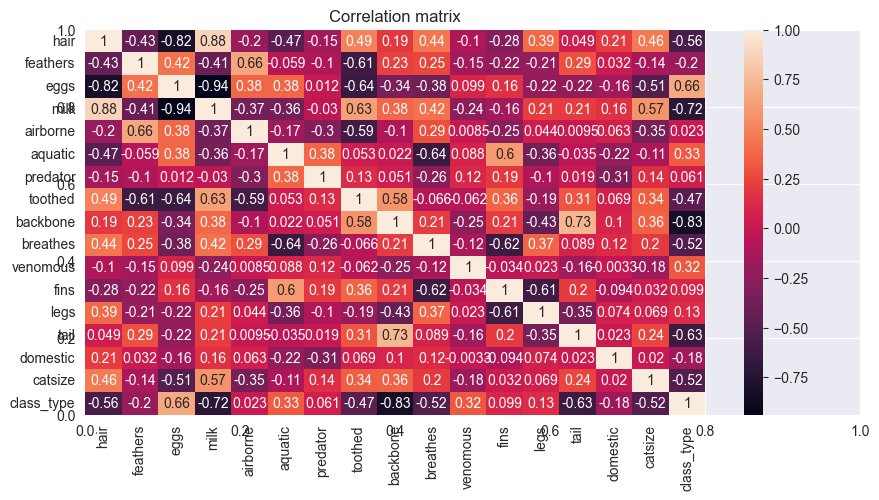

In [49]:

plt.subplots(figsize=(10,5)) # 1000x500 
ax = plt.axes()
ax.set_title('Correlation matrix')
corr = zoo.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)


In [64]:
from animals.functions import correlation_plot


IndentationError: expected an indented block after 'for' statement on line 43 (functions.py, line 44)

In [50]:
#which feature(s) are relevant to efficiently classify the animals?
print(corr[corr != 1][abs(corr)> 0.65].dropna(how='all', axis=1).dropna(how='all', axis=0))


                hair  feathers      eggs      milk  airborne  backbone  \
hair             NaN       NaN -0.817382  0.878503       NaN       NaN   
feathers         NaN       NaN       NaN       NaN  0.656553       NaN   
eggs       -0.817382       NaN       NaN -0.938848       NaN       NaN   
milk        0.878503       NaN -0.938848       NaN       NaN       NaN   
airborne         NaN  0.656553       NaN       NaN       NaN       NaN   
backbone         NaN       NaN       NaN       NaN       NaN       NaN   
tail             NaN       NaN       NaN       NaN       NaN  0.731762   
class_type       NaN       NaN  0.661825 -0.723683       NaN -0.828845   

                tail  class_type  
hair             NaN         NaN  
feathers         NaN         NaN  
eggs             NaN    0.661825  
milk             NaN   -0.723683  
airborne         NaN         NaN  
backbone    0.731762   -0.828845  
tail             NaN         NaN  
class_type       NaN         NaN  


In [51]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [52]:
df.iloc[:, 1:19].groupby("Class_Number").mean()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
Class_Number,,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488,1.0
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000,2.0
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000,3.0
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,4.0
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000,5.0
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000,6.0
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000,7.0


# K Means Clustering

## the elbow method

C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1

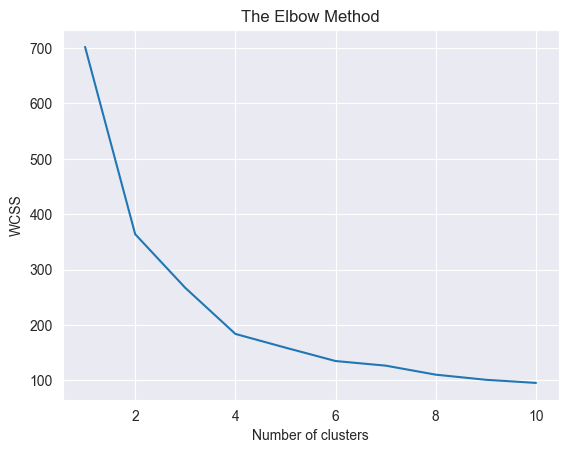

In [53]:

animal_features = zoo[['hair', 'feathers', 'eggs', 'milk', 'airborne',
                        'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
                        'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]
wcss = []  #Within-Cluster Sum of Square,is the sum of the squared distance between each point and the centroid in a cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(animal_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## implementation and clusters visualization

In [ ]:
from animals.functions import kmeans

C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


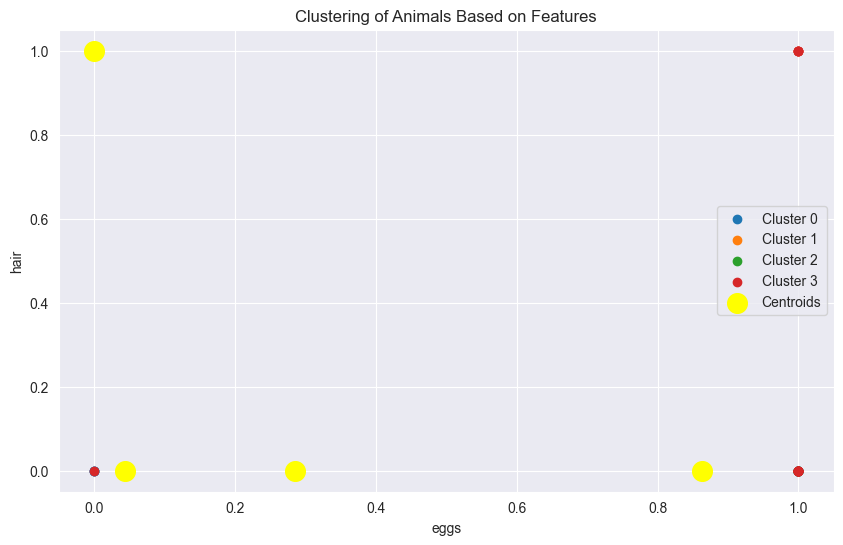

In [54]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

y_kmeans = kmeans.fit_predict(animal_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = zoo[y_kmeans == cluster_num]
    plt.scatter(cluster_data['eggs'], cluster_data['hair'], label=f'Cluster {cluster_num}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clustering of Animals Based on Features')
plt.xlabel('eggs')
plt.ylabel('hair')
plt.legend()
plt.show()

